In [1]:
from netin.models import HomophilyModel
from netin.models import PAModel
from netin.models import PAHModel
from netin.models import PATCHModel
from netin.models import CompoundLFM
from netin.models import BarabasiAlbertModel
from netin.algorithms.janus import JanusModelFitting

In [2]:
OUTPUT_DIR = 'inference_results'
FIGSIZE = (6,3) 

In [3]:
N=1000
m=2
f_m=0.5
h_m=0.2
h_M=0.2
seed=1234
g = PAHModel(N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, seed=seed)
g = g.simulate()

In [4]:
is_global = False
k_max = 10
k_log_scale = False
verbose = False
j = JanusModelFitting(graph=g, is_global=is_global, k_max=k_max, k_log_scale=k_log_scale, verbose=verbose)

In [5]:
h = j.get_uniform_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

/home/espinl/.conda/envs/py39NetIn/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [6]:
h = j.get_self_loop_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [7]:
h = j.get_data_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [8]:
# n_iter = 20
# best_evidence = j.model_fitting(PAHModel, n_iter=n_iter,
#                                 N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M)
# j.evidences.update(best_evidence)

In [9]:
# best_evidence = j.model_fitting(BarabasiAlbertModel, n_iter=n_iter,
#                                 N=N, m=2)
# j.evidences.update(best_evidence)

In [10]:
# p_tc = 0.8
# lfm_local = lfm_global = CompoundLFM.UNIFORM
# best_evidence = j.model_fitting(PATCHModel, n_iter=n_iter,
#                                 N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, p_tc=p_tc, lfm_local=lfm_local, lfm_global=lfm_global)
# hname = list(best_evidence.keys())[0]
# best_evidence[f'{hname}_{p_tc}'] = best_evidence.pop(hname)
# j.evidences.update(best_evidence)

In [11]:
# p_tc = 0.2
# lfm_local = lfm_global = CompoundLFM.UNIFORM
# best_evidence = j.model_fitting(PATCHModel, n_iter=n_iter,
#                                 N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, p_tc=p_tc, lfm_local=lfm_local, lfm_global=lfm_global)
# hname = list(best_evidence.keys())[0]
# best_evidence[f'{hname}_{p_tc}'] = best_evidence.pop(hname)
# j.evidences.update(best_evidence)

In [12]:
# h = j.get_H_hypothesis(h_m=h_m, h_M=h_M)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [13]:
# h = j.get_H_hypothesis(h_m=0.2, h_M=0.8)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [14]:
# h = j.get_H_hypothesis(h_m=0.2, h_M=0.2)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [15]:
# h = j.get_H_hypothesis(h_m=0.5, h_M=0.5)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [16]:
# h = j.get_PA_hypothesis()
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [17]:
# h = j.get_PAH_hypothesis(h_m=h_m, h_M=h_M)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [18]:
# h = j.get_PAH_hypothesis(h_m=0.2, h_M=0.2)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [19]:
# h = j.get_PAH_hypothesis(h_m=0.5, h_M=0.5)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [20]:
# h = j.get_PAH_hypothesis(h_m=0.9, h_M=0.9)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [21]:
# h = j.get_PAH_hypothesis(h_m=0.2, h_M=0.9)
# e = j.generate_evidences(h)
# j.add_evidences(h.name, e)
# del(h)

In [22]:
e = j.model_fitting_belief_based(PAModel, first_mover_bias=True)
j.update_evidences(e)

In [23]:
e = j.model_fitting_belief_based(HomophilyModel, first_mover_bias=True)
j.update_evidences(e)

In [24]:
e = j.model_fitting_belief_based(PAHModel, first_mover_bias=True)
j.update_evidences(e)

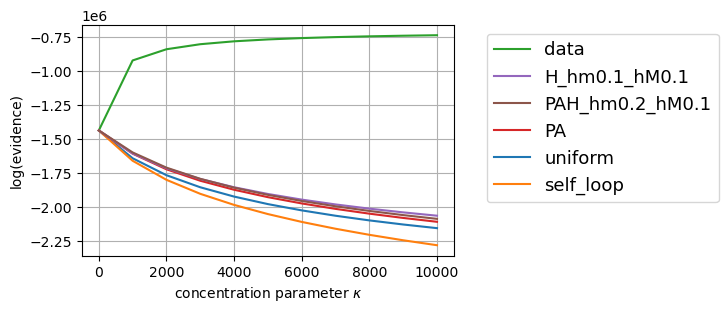

In [25]:
j.plot_evidences(figsize=FIGSIZE, bboxx=1.4,
                output_dir=OUTPUT_DIR)

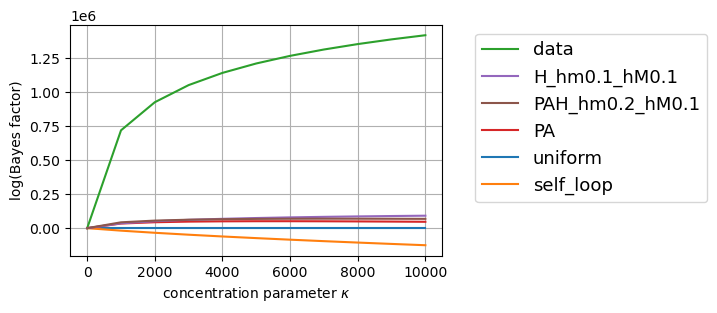

In [26]:
j.plot_evidences(bayes_factors=True, 
                 figsize=FIGSIZE, bboxx=1.4,
                 output_dir=OUTPUT_DIR)

In [27]:
j.save_evidences(OUTPUT_DIR)